# *Cargar y recortar tablero*

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carga la imagen en una variable
pos_inicio = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-inicio.jpeg")
pos_mid = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-mid.jpeg")
pos_mid2 = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-mid2.jpeg")
pos_ataque = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-ataque.jpeg")
iluminada = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/iluminada.jpeg")
pos_inicial_esp = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-inicio-esp.jpeg")
pos_mid_esp = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-mid-esp.jpeg")
pos_mid2_esp = cv2.imread("/home/tom/universidad/LIDI/cv-tablero/tableros-img/pos-mid2-esp.jpeg")
tablero_normal = cv2.imread('/home/tom/universidad/LIDI/cv-tablero/tableros-img/tablero-comun.png')

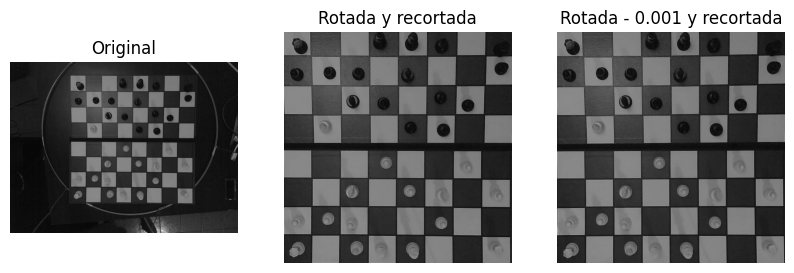

In [10]:
def mostrarContornos(img,min,max):
    # Aplicar deteccion de bordes utilizando Canny
    edges = cv2.Canny(img, min, max, apertureSize=3)
    
    cv2.imshow('Detector de contornos', edges)
    cv2.waitKey()
    cv2.destroyAllWindows()    
    return edges

# Convertimos la imagen a gris
pos_inicial_esp_gray = cv2.cvtColor(pos_mid_esp, cv2.COLOR_BGR2GRAY)

# Recortamos el tablero
x1, y1 = 430, 113  # Esquina superior izquierda
x2, y2 = 1289, 984  # Esquina inferior derecha
tablero_recorte = pos_inicial_esp_gray[y1:y2, x1:x2].copy()

# Aplicar deteccion de bordes utilizando Canny
edges = mostrarContornos(tablero_recorte, 200, 500)

# Encontrar las lineas presentes en la imagen utilizando la transformada de Hough
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Calcular el angulo promedio solo de las líneas horizontales detectadas
angle = np.mean([np.arctan2(line[0][3] - line[0][1], line[0][2] - line[0][0]) for line in lines if abs(line[0][3] - line[0][1]) < abs(line[0][2] - line[0][0])])

# Rotar la imagen utilizando el ángulo calculado
(h, w) = tablero_recorte.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle * 180 / np.pi, 1.0)
rotated = cv2.warpAffine(tablero_recorte, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

## NOTA: Ignorar el angle2 y rotated2, solo son pruebas ===============================================================
angle2 = np.mean([np.arctan2(line[0][3] - line[0][1], line[0][2] - line[0][0]) for line in lines if abs(line[0][3] - line[0][1]) < abs(line[0][2] - line[0][0])]) + 0.009
(h, w) = tablero_recorte.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle2 * 180 / np.pi, 1.0)
rotated2 = cv2.warpAffine(tablero_recorte, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
## ====================================================================================================================

# Mostrar la imagen original y la imagen rotada
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(pos_inicial_esp_gray, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
ax[1].set_title('Rotada y recortada')
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(rotated2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Rotada - 0.001 y recortada')
ax[2].axis('off')
plt.show()



# cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
# cv2.imshow('custom window', edges)
# cv2.resizeWindow('custom window', 1000, 1000)
# cv2.waitKey(4000)
# cv2.destroyAllWindows()

## ==========================================================================
#   NOTAS: 
# 1. 
# cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
# cv2.imshow('custom window', tablero_recorte)
# cv2.resizeWindow('custom window', 1000, 1000)
# cv2.waitKey()
# cv2.destroyAllWindows()
 
# 2.
# Find the chessboard corners
# ret, corners = cv2.findChessboardCorners(pos_inicial_esp_gray, (9, 9))
# print(ret, corners)
# # Draw the chessboard corners on the image
# if ret: 
#   cv2.drawChessboardCorners(pos_inicial_esp, (9, 9), corners, ret)

# 3.
# amarillobajo = np.array([15,50,50],np.uint8)
# amarilloalto = np.array([25,255,255],np.uint8)
# mascara1 = cv2.inRange(imghsv,amarillobajo, amarilloalto)
# 
# verdebajo = np.array([36,50,50],np.uint8)
# verdealto = np.array([75,255,255],np.uint8)
# mascara2 = cv2.inRange(imghsv,verdebajo,verdealto)


In [119]:
## Utilizaremos rotated como la imagen base para empezar a detectar la posicion de tablero
# cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
# cv2.imshow('custom window', rotated)
# cv2.resizeWindow('custom window', 1000, 1000)
# cv2.waitKey()
# cv2.destroyAllWindows()

alto, ancho = 99,89

casilleros = []

gap = 447
x = [0, 89, 199, 306, 416, 545, 654, 760]
y = [0, 99, 213, 320, 430, 539, 650, 759, ]

for fil in range(8):
    for col in range(8):
        casilleros.append(rotated[y[col]:y[col+1], x[fil]:x[fil+1]].copy())
        cv2.imshow(f"Imagen {fil},{col}", casilleros[fil * 8 + col])
        cv2.waitKey(0)
        cv2.destroyAllWindows()

IndexError: list index out of range

In [39]:
# procesamos la imagen 
cv2.imshow('Pos mid', pos_mid)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Convert the image to grayscale
pos_mid_gray = cv2.cvtColor(pos_mid, cv2.COLOR_BGR2GRAY)

cv2.imshow('Pos mid grayscale', pos_mid_gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(pos_mid_gray, (9, 9))

print(ret, corners)
cv2.imshow('tablero normal: ',tablero_normal)
cv2.waitKey(10000)
cv2.destroyAllWindows()


# Draw the chessboard corners on the image
if ret:
  cv2.drawChessboardCorners(pos_mid, (9, 9), corners, ret)

# Display the image
cv2.imshow('edges detected', pos_mid) 
cv2.waitKey(5000)
cv2.destroyAllWindows()

False None


In [44]:
## Imagen pos mid esp32
tablero = cv2.imread('/home/tom/universidad/LIDI/cv-tablero/tableros-img/tablero-comun.jpeg')

# procesamos la imagen 
cv2.imshow('Pos mid ESP32', tablero)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Convert the image to grayscale
pos_mid_gray = cv2.cvtColor(tablero, cv2.COLOR_BGR2GRAY)

cv2.imshow('Pos mid grayscale', pos_mid_gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(pos_mid_gray, (7,7), cv2.CALIB_CB_ADAPTIVE_THRESH)
print(ret, corners)

# Draw the chessboard corners on the image
if ret:
  cv2.drawChessboardCorners(pos_mid_gray, (7, 7), corners, ret)

# Display the image
cv2.imshow('edges detected', pos_mid_gray) 
cv2.waitKey(5000)
cv2.destroyAllWindows()

True [[[139.5423  139.54117]]

 [[209.5206  139.52289]]

 [[279.545   139.57593]]

 [[349.53897 139.52794]]

 [[419.5423  139.54117]]

 [[489.5206  139.52289]]

 [[559.54504 139.57591]]

 [[139.5353  209.51723]]

 [[209.53673 209.55083]]

 [[279.517   209.55717]]

 [[349.5402  209.54384]]

 [[419.5353  209.51723]]

 [[489.5367  209.55083]]

 [[559.517   209.55717]]

 [[139.56563 279.5428 ]]

 [[209.55972 279.52563]]

 [[279.5648  279.56012]]

 [[349.55875 279.55258]]

 [[419.56564 279.5428 ]]

 [[489.55972 279.52563]]

 [[559.56476 279.56012]]

 [[139.52034 349.56946]]

 [[209.52461 349.56604]]

 [[279.53253 349.54477]]

 [[349.6106  349.54172]]

 [[419.52036 349.56946]]

 [[489.52463 349.56604]]

 [[559.53253 349.54477]]

 [[139.5423  419.54117]]

 [[209.5206  419.5229 ]]

 [[279.53842 419.5643 ]]

 [[349.53296 419.5341 ]]

 [[419.5423  419.54117]]

 [[489.5206  419.5229 ]]

 [[559.53845 419.56433]]

 [[139.5353  489.51724]]

 [[209.53673 489.55084]]

 [[279.517   489.55716]]

 [[349.

In [35]:
## Version 2

nline = 7
ncol = 7

## termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

## processing
gray = cv2.cvtColor(pos_mid_esp, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nline, ncol), None)
corners2 = cv2.cornerSubPix(gray, corners, (7, 7), (-1, -1), criteria)


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cornerSubPix'


In [ ]:
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

# Posicion inicial

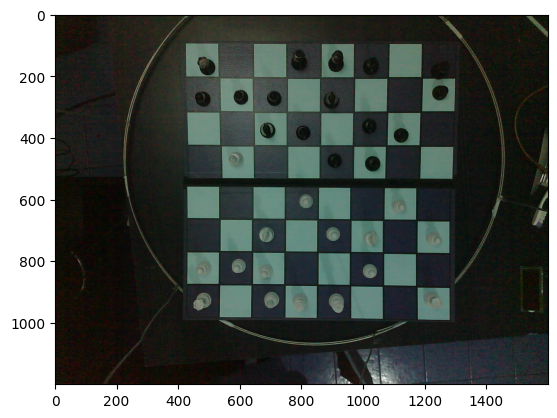

In [ ]:
# Muestra la imagen en una ventana
plt.imshow(mid_iluminada2)
plt.show()

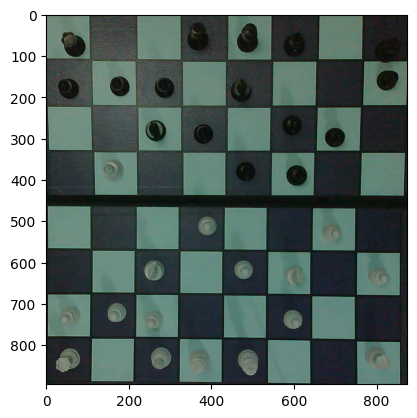

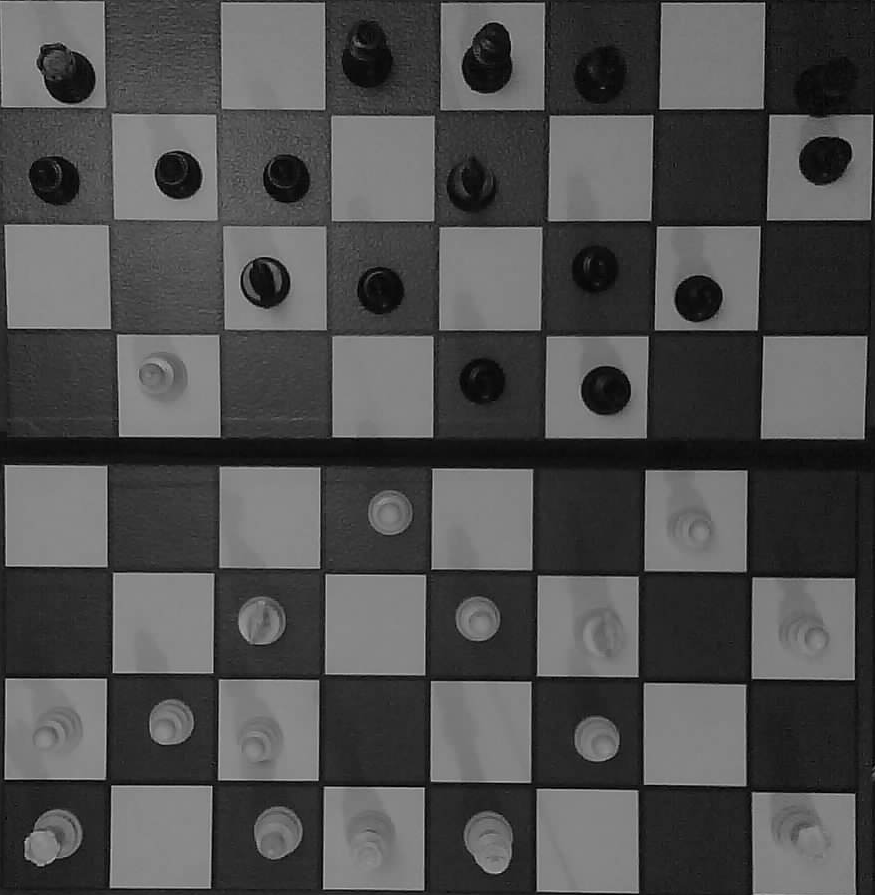

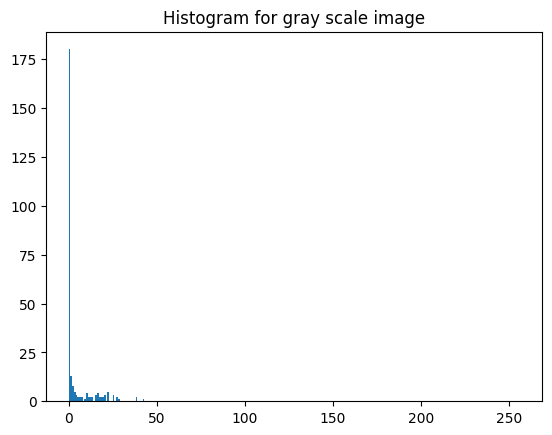

In [ ]:
# Indica las coordenadas del área a recortar en píxeles
x1, y1 = 425, 95  # Esquina superior izquierda
x2, y2 = 1300, 990  # Esquina inferior derecha

# Recorta la imagen en base a las coordenadas indicadas
imagen_recortada = mid_iluminada2[y1:y2, x1:x2].copy()

# Muestra la imagen recortada en una ventana
plt.imshow(imagen_recortada)
plt.show()

gray = cv2.cvtColor(imagen_recortada, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

dst = cv2.calcHist(gray, [0], None, [256], [0,256])

plt.hist(dst.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
#imghsv = cv2.cvtColor(imagen_recortada,cv2.COLOR_BGR2HSV)

#blancobajo = np.array([160,50,50],np.uint8)
#blancoalto = np.array([180,255,255],np.uint8)
#mascara1 = cv2.inRange(imghsv, blancobajo, blancoalto)

#cv2_imshow(mascara1)
#mascara1 = ~mascara1
#cv2_imshow(mascara1)

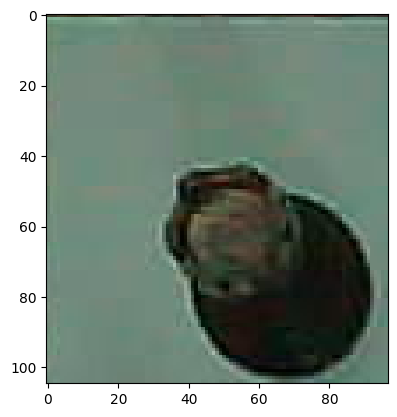

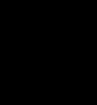

In [ ]:
x1, y1 = 3, 0  # Esquina superior izquierda
x2, y2 = 100, 105  # Esquina inferior derecha
casilla = imagen_recortada[y1:y2, x1:x2].copy()

plt.imshow(casilla)
plt.show()

imghsv = cv2.cvtColor(casilla,cv2.COLOR_BGR2HSV)

amarillobajo = np.array([15,50,50],np.uint8)
amarilloalto = np.array([25,255,255],np.uint8)
mascara1 = cv2.inRange(imghsv,amarillobajo, amarilloalto)

verdebajo = np.array([36,50,50],np.uint8)
verdealto = np.array([75,255,255],np.uint8)
mascara2 = cv2.inRange(imghsv,verdebajo,verdealto)
cv2_imshow(mascara1)



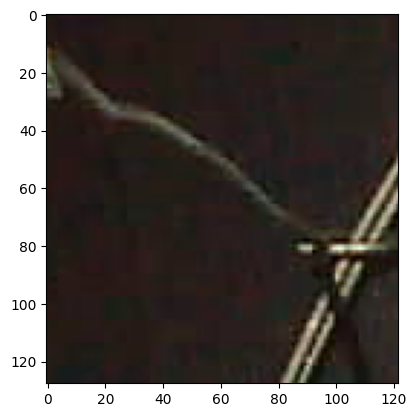

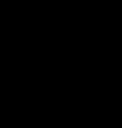

In [ ]:
x1, y1 = 148, 10  # Esquina superior izquierda
x2, y2 = 270, 138  # Esquina inferior derecha
casilla = imagen_recortada[y1:y2, x1:x2].copy()


plt.imshow(casilla)
plt.show()

imghsv = cv2.cvtColor(casilla,cv2.COLOR_BGR2HSV)

amarillobajo = np.array([15,50,50],np.uint8)
amarilloalto = np.array([25,255,255],np.uint8)
mascara1 = cv2.inRange(imghsv,amarillobajo, amarilloalto)

verdebajo = np.array([36,50,50],np.uint8)
verdealto = np.array([75,255,255],np.uint8)
mascara2 = cv2.inRange(imghsv,verdebajo,verdealto)
cv2_imshow(mascara1)



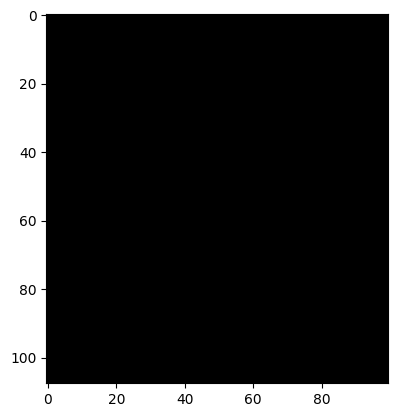

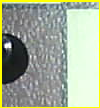

Se ha detectado una pieza.


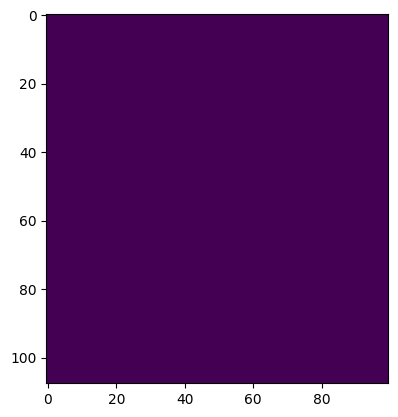

In [ ]:
x1, y1 = 410, 20  # Esquina superior izquierda
x2, y2 = 510, 128   # Esquina inferior derecha
casilla = imagen_recortada[y1:y2, x1:x2].copy()

imghsv = cv2.cvtColor(casilla,cv2.COLOR_BGR2HSV)

blancobajo = np.array([15,50,50],np.uint8)
blancoalto = np.array([25,255,255],np.uint8)
mascara1 = cv2.inRange(imghsv,blancobajo, blancoalto)
mascara1 = ~mascara1

plt.imshow(mascara1, cmap="gray")
plt.show()

contorno,_ = cv2.findContours(mascara1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cont = 0

for c in contorno:
    area = cv2.contourArea(c)
    if (area > 60):
        cont = cont + 1
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(casilla,(x,y),(x+w,y+h),(0,255,255),2)
        cv2.putText(casilla,str(cont),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,255),2)

cv2_imshow(casilla)

if len(contorno) > 0:
    print("Se ha detectado una pieza.")
else:
    print("No se ha detectado una pieza.")

plt.imshow(mascara1)
plt.show()


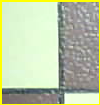

Se ha detectado una pieza.


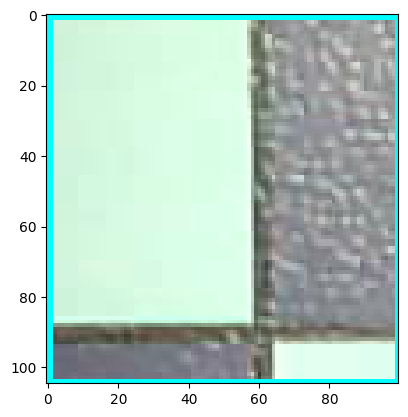

In [ ]:
x1, y1 = 415, 150  # Esquina superior izquierda
x2, y2 = 515, 255  # Esquina inferior derecha
casilla1 = imagen_recortada[y1:y2, x1:x2].copy()

imghsv = cv2.cvtColor(casilla1,cv2.COLOR_BGR2HSV)

blancobajo = np.array([160,50,50],np.uint8)
blancoalto = np.array([180,255,255],np.uint8)
mascara1 = cv2.inRange(imghsv, blancobajo, blancoalto)

mascara1 = ~mascara1

contorno,_ = cv2.findContours(mascara1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cont = 0
for c in contorno:
    area = cv2.contourArea(c)
    if (area > 50):
        cont = cont + 1
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(casilla1,(x,y),(x+w,y+h),(0,255,255),2)
        cv2.putText(casilla1,str(cont),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,255),2)

cv2_imshow(casilla1)

if len(contorno) > 0:
    print("Se ha detectado una pieza.")
else:
    print("No se ha detectado una pieza.")

plt.imshow(casilla1)
plt.show()

# Posicion de middle game


# procesamiento-tablero-v2

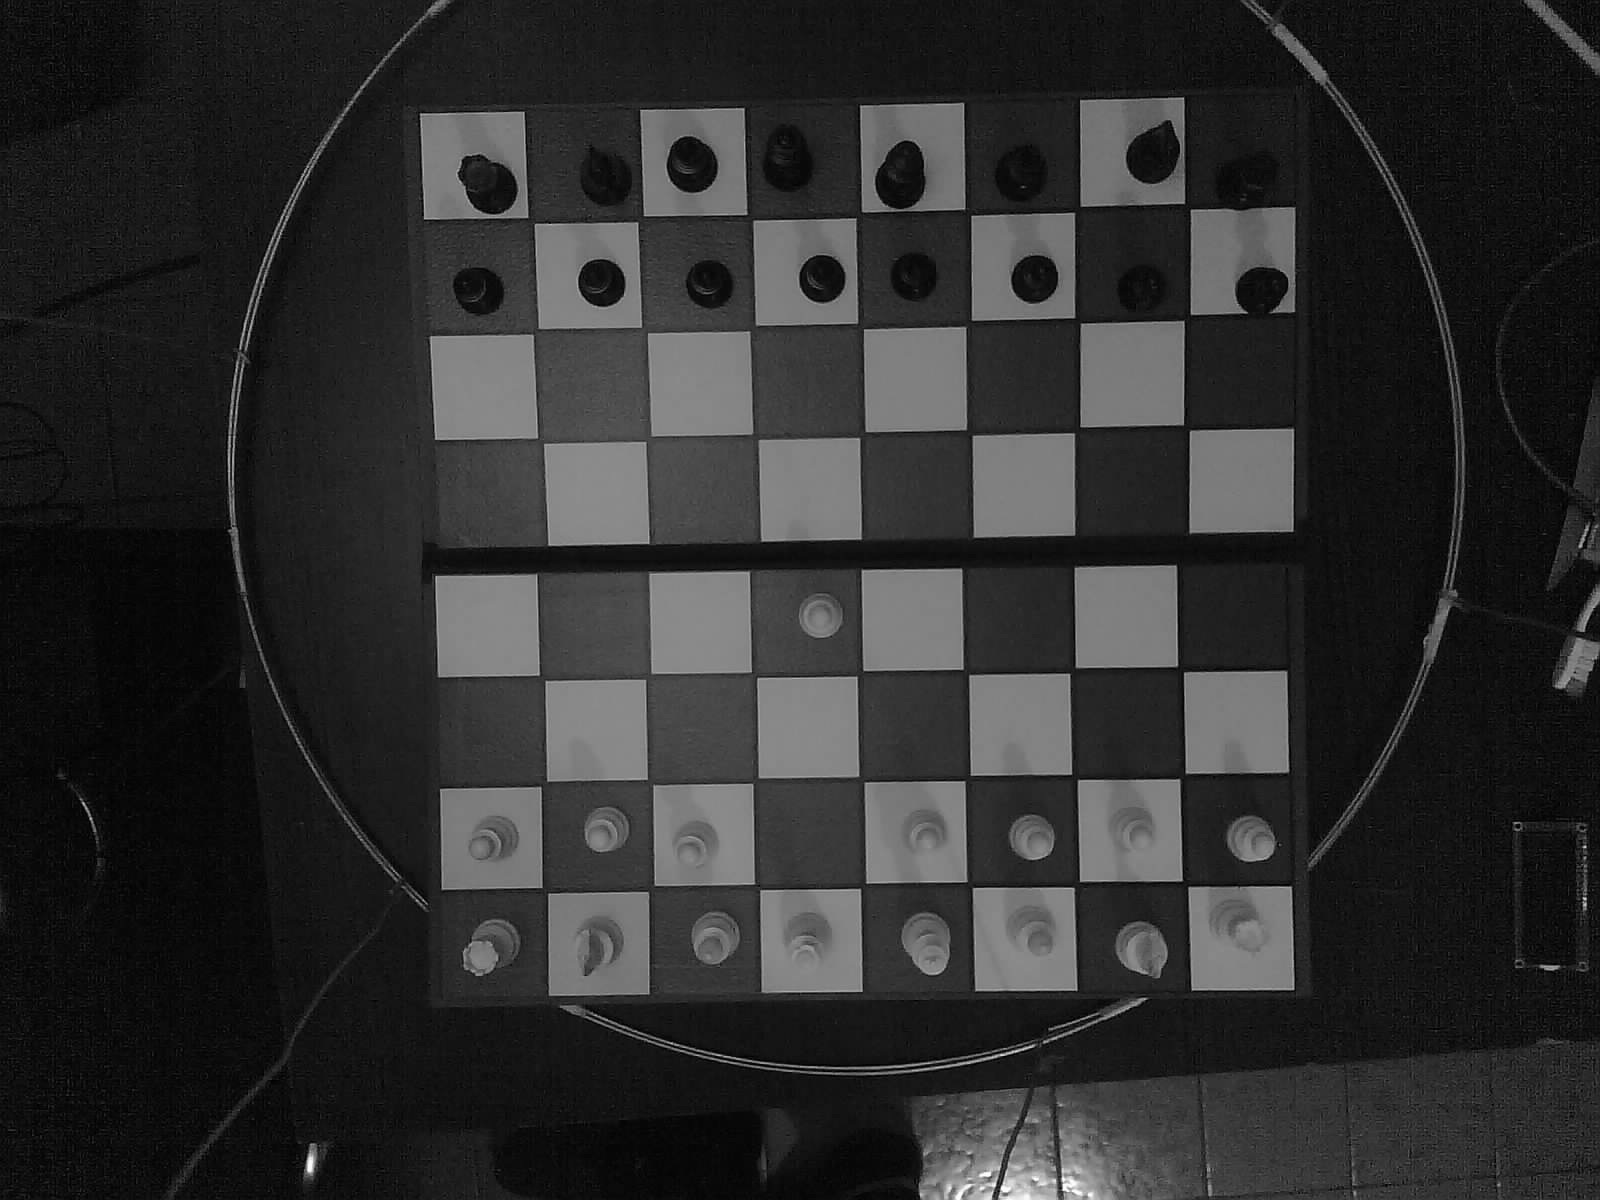

None


In [18]:
import numpy as np 
import cv2
import sys
import os


nfila = 8
ncol = 8

img = cv2.imread('/content/pos-inicial.jpg')

# El algoritmo se detiene despues de 30 iteraciones o cuando el error es de menos de 0.001
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Convierto la imagen a gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

# Devuelve ret que es un booleano que determina si se encontro un tablero y cornes es una 
# lista de puntos en la imagen que representan los vertices 
ret, corners = cv2.findChessboardCorners(gray, (nfila,ncol), None)

print(corners)


# Refina las coordenadas del tablero,
if ret == True:
  corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1,-1), criteria)


